In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Exploratory Climate Analysis

<IPython.core.display.Javascript object>


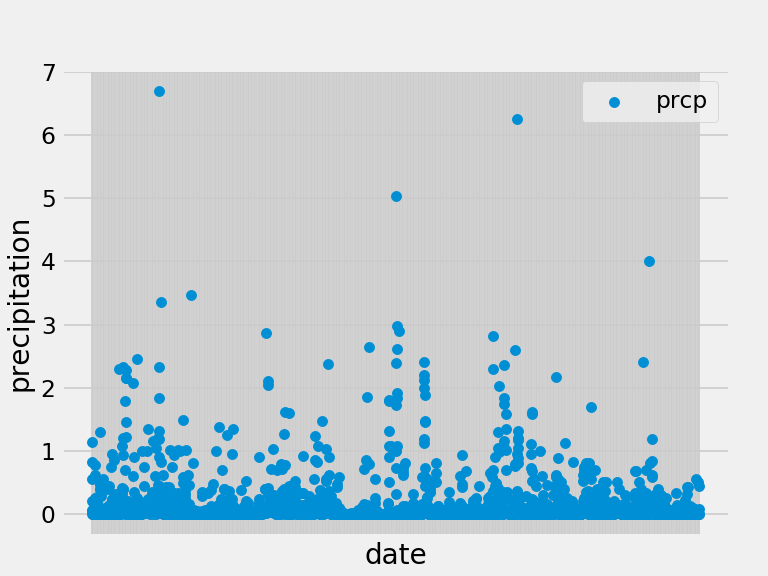

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
query_date = dt.date(2016, 8, 1)

date_data = session.query(Measurement.date).filter(Measurement.date > query_date).all()

# Calculate the date 1 year ago from today
m = int(dt.date.today().strftime("%m"))
d = int(dt.date.today().strftime("%d"))
y = int(dt.date.today().strftime("%y"))
year_ago_date = dt.date(y, m, d) - dt.timedelta(days=365)
#print(year_ago_date)
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.prcp).filter(Measurement.date > query_date).all()
rain_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > query_date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain_data)

# Sort the dataframe by date
rain_df = rain_df.sort_values(by='date') 
rain_df=rain_df.dropna(how='any')
# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates
fig, ax = plt.subplots()
fig = plt.scatter(rain_df.date,rain_df.prcp)
plt.xticks(rotation=45)
plt.xlabel("date")
plt.ylabel("precipitation")
leg = ax.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
#rain_df = rain_df.set_index('date')
#ax.xaxis.get_major_locator()

In [15]:
rain_df

date  prcp
0     2016-08-02  0.05
1068  2016-08-02  0.00
1623  2016-08-02  0.83
746   2016-08-02  0.55
1996  2016-08-02  1.14
382   2016-08-02  0.20
1265  2016-08-02  0.07
1624  2016-08-03  0.01
1069  2016-08-03  0.02
1     2016-08-03  0.00
1266  2016-08-03  0.00
383   2016-08-03  0.02
747   2016-08-03  0.00
1070  2016-08-04  0.13
384   2016-08-04  0.62
1267  2016-08-04  0.25
2     2016-08-04  0.04
1625  2016-08-04  0.77
3     2016-08-05  0.01
1268  2016-08-05  0.00
1626  2016-08-05  0.27
1071  2016-08-05  0.03
385   2016-08-05  0.03
1269  2016-08-06  0.04
1627  2016-08-06  0.14
4     2016-08-06  0.00
386   2016-08-06  0.07
1628  2016-08-07  0.47
5     2016-08-07  0.39
2001  2016-08-07  1.30
...          ...   ...
1060  2017-08-15  0.00
1616  2017-08-15  0.06
375   2017-08-15  0.02
1992  2017-08-15  0.32
1993  2017-08-16  0.12
2358  2017-08-16  0.42
1061  2017-08-16  0.00
1617  2017-08-16  0.07
2359  2017-08-17  0.13
1618  2017-08-17  0.05
1994  2017-08-17  0.01
1062  2017-08-17  0.00
1063  2017-08-18  0.00
376   2017-08-18  0.00
1995  2017-08-18  0.06
1064  2017-08-19  0.00
377   2017-08-19  0.00
2361  2017-08-19  0.09
1065  2017-08-20  0.01
378   2017-08-20  0.00
379   2017-08-21  0.00
1066  2017-08-21  0.02
2363  2017-08-21  0.56
380   2017-08-22  0.00
2364  2017-08-22  0.50
1621  2017-08-22  0.00
1067  2017-08-23  0.00
381   2017-08-23  0.00
1622  2017-08-23  0.08
2365  2017-08-23  0.45

[2143 rows x 2 columns]

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

prcp
count  2143.000000
mean      0.179258
std       0.457708
min       0.000000
25%       0.000000
50%       0.020000
75%       0.140000
max       6.700000

In [17]:
# How many stations are available in this dataset?
stations = session.query(Measurement.station).all()
stations = pd.DataFrame(stations)
num_stations = stations.nunique()
num_stations = num_stations[0]
print(f'There are {num_stations} stations in the dataset')

There are 9 stations in the dataset


In [18]:
from sqlalchemy import distinct
number_stations = session.query(func.count(distinct(Measurement.station))).all()
number_stations[0]

(9)

In [19]:
# What are the most active stations?
# List the stations and the counts in descending order.
order = stations.station.value_counts()
order

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station_id = "USC00519281"
max_station = session.query(func.max(Measurement.tobs)).filter(Measurement.station == station_id).all()
#session.query(func.max(Table.column))
print("Maximum temp - " + str(max_station[0][0]))
min_station = session.query(func.min(Measurement.tobs)).filter(Measurement.station == station_id).all()
print("Minimum temp - "+ str(min_station[0][0]))
avg_station = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == station_id).all()
print("Average temp - " + str(avg_station[0][0]))


Maximum temp - 85.0
Minimum temp - 54.0
Average temp - 71.66378066378067


In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).all()

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

<IPython.core.display.Javascript object>


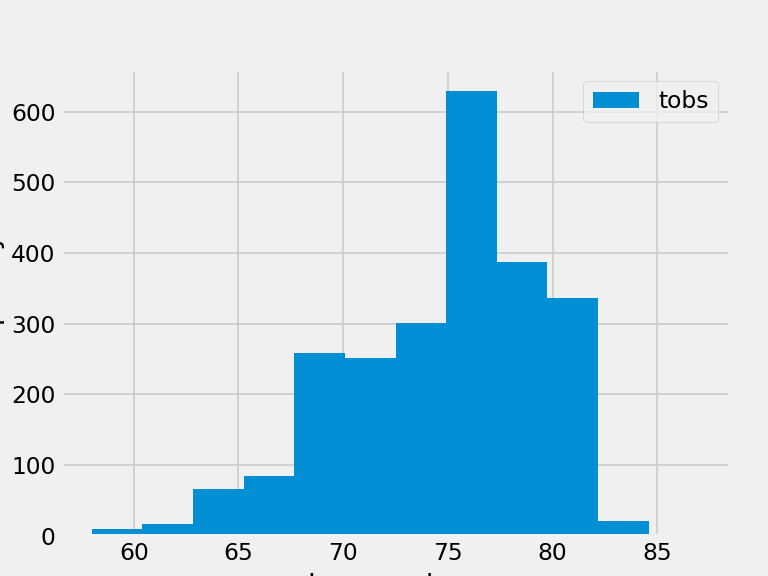

In [22]:
temp_station = "USC00519281"
hT_df = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date > query_date).all()
hT_df = pd.DataFrame(hT_df)
hT_df = hT_df.dropna(how="any")
hT_df = hT_df.sort_values(by="date")
bins = 12
fig, ax = plt.subplots()
n, bins, patches = ax.hist(hT_df.tobs, bins)
plt.xlabel("temperature")
plt.ylabel("frequency")
leg = ax.legend();

In [23]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2015-06-18','2015-06-25'))

[(70.0, 75.61666666666666, 80.0)]


<IPython.core.display.Javascript object>


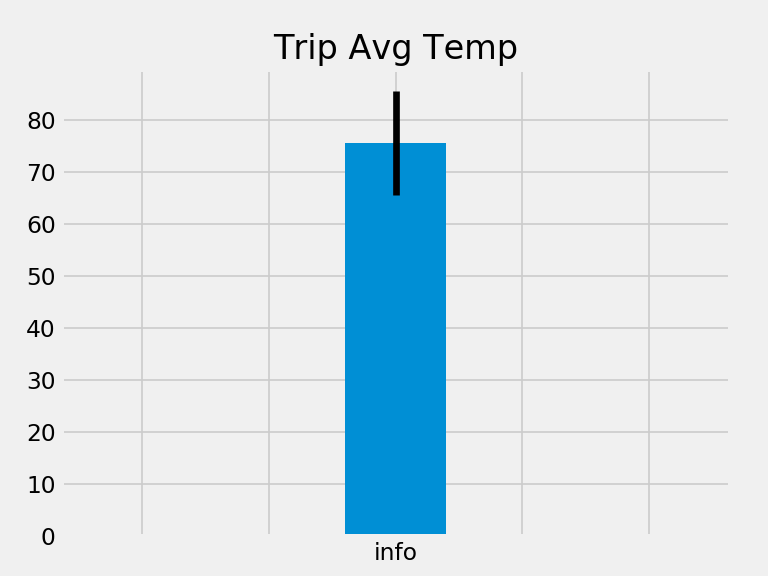

In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
temp_mean = 75.61666666666666
temp_min = 70.0
temp_max = 80.0
#bars = ('group1', 'group2', 'group3', 'group4', 'group5')
#
fig, ax1 = plt.subplots()
#bars = ('vacation info')
#y_pos = np.arange(len(bars))
#
## Create bars
#plt.bar(y_pos, temp_mean)
#plt.xticks(y_pos, bars, color='orange')
#plt.show()
#
height = [0, 0, temp_mean, 0, 0]
# 
# Choose the names of the bars
bars = ('', '', 'info', '', '')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height,yerr=[0,0,temp_max-temp_min,0,0])
 
# Create names on the x-axis
plt.xticks(y_pos, bars, color='black')
plt.yticks(color='black')
plt.title("Trip Avg Temp")
 
# Show graphic
plt.show()


In [26]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
query_date1 = dt.date(2015, 6, 18)
query_date2 = dt.date(2015, 6, 25)
trip_data = session.query(Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation).filter(Measurement.date > query_date1)\
    .filter(Measurement.date < query_date2).group_by(Station.station).all()
trip_data = pd.DataFrame(trip_data)
trip_data
#station TEXT
#name TEXT
#latitude FLOAT
#longitude FLOAT
#elevation FLOAT

station                                    name  latitude  longitude  \
0  USC00511918       HONOLULU OBSERVATORY 702.2, HI US  21.31520 -157.99920   
1  USC00513117                    KANEOHE 838.1, HI US  21.42340 -157.80150   
2  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US  21.52130 -157.83740   
3  USC00516128            MANOA LYON ARBO 785.2, HI US  21.33310 -157.80250   
4  USC00517948                       PEARL CITY, HI US  21.39340 -157.97510   
5  USC00518838              UPPER WAHIAWA 874.3, HI US  21.49920 -158.01110   
6  USC00519281                     WAIHEE 837.5, HI US  21.45167 -157.84889   
7  USC00519397                    WAIKIKI 717.2, HI US  21.27160 -157.81680   
8  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US  21.33556 -157.71139   

   elevation  
0        0.9  
1       14.6  
2        7.0  
3      152.4  
4       11.9  
5      306.6  
6       32.9  
7        3.0  
8       19.5

In [27]:
rain_info = session.query(Station.station,func.sum(Measurement.prcp).label("Total station prcp")).filter(Measurement.date > query_date1).filter(Measurement.date < query_date2).group_by(Measurement.station)\
    .order_by(func.sum(Measurement.prcp).desc()).all()
rain_info = pd.DataFrame(rain_info)
rain_info

station  Total station prcp
0  USC00516128               19.80
1  USC00516128                5.58
2  USC00516128                2.25
3  USC00516128                1.35
4  USC00516128                1.17
5  USC00516128                0.99
6  USC00516128                0.45
7  USC00516128                0.00

## Optional Challenge Assignment

In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [29]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [30]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [31]:
# Plot the daily normals as an area plot with `stacked=False`
